---

# World Happiness Report Project

## Project Description
The World Happiness Report is a significant survey that assesses global happiness levels. Published annually, this report ranks countries based on their happiness, providing valuable insights into the well-being of nations. This project aims to develop a predictive model for happiness scores using various factors provided in the dataset. By leveraging machine learning techniques, we seek to understand how economic, social, and environmental variables contribute to a country's happiness.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

## **2. Data Preprocessing:**

### 2.1. Importing Libraries and Data

In [ ]:
df = pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### 2.2. Data Overview and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### 2.1 Handling Categorical Variables

In [ ]:
# Encoding categorical variables 'Country' and 'Region' using one-hot encoding
df = pd.get_dummies(df, columns=['Country', 'Region'], drop_first=True)

2.2 Normalization/Scaling

In [ ]:
# Normalization/Scaling (if needed) for numerical features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the numerical features for scaling
numerical_features = ['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

# Scale the selected numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## 3. Exploratory Data Analysis (EDA)
### 3.1 Summary Statistics

In [ ]:
summary_stats = df.describe()
print(summary_stats)

       Happiness Rank  Happiness Score  Standard Error  \
count    1.580000e+02       158.000000    1.580000e+02   
mean     8.994212e-17         5.375734   -1.011849e-16   
std      1.003180e+00         1.145010    1.003180e+00   
min     -1.721000e+00         2.839000   -1.720398e+00   
25%     -8.604306e-01         4.526000   -6.211883e-01   
50%      1.387679e-04         5.232500   -2.307972e-01   
75%      8.607081e-01         6.243750    2.583253e-01   
max      1.721277e+00         7.587000    5.209813e+00   

       Economy (GDP per Capita)        Family  Health (Life Expectancy)  \
count              1.580000e+02  1.580000e+02              1.580000e+02   
mean              -2.248553e-16 -2.248553e-16             -2.248553e-16   
std                1.003180e+00  1.003180e+00              1.003180e+00   
min               -2.105641e+00 -3.650183e+00             -2.558965e+00   
25%               -7.473806e-01 -4.943668e-01             -7.757959e-01   
50%                1.595344

### 3.2 Data Visualization

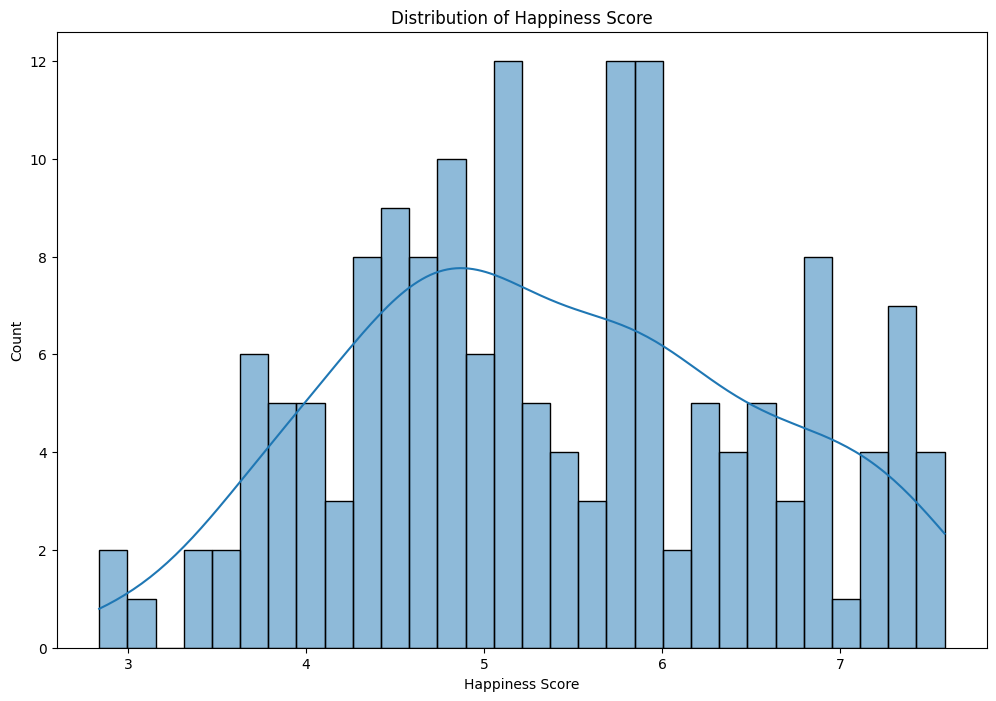

In [ ]:
# Visualize the distributions of numerical features
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Happiness Score', bins=30, kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Count')
plt.show()

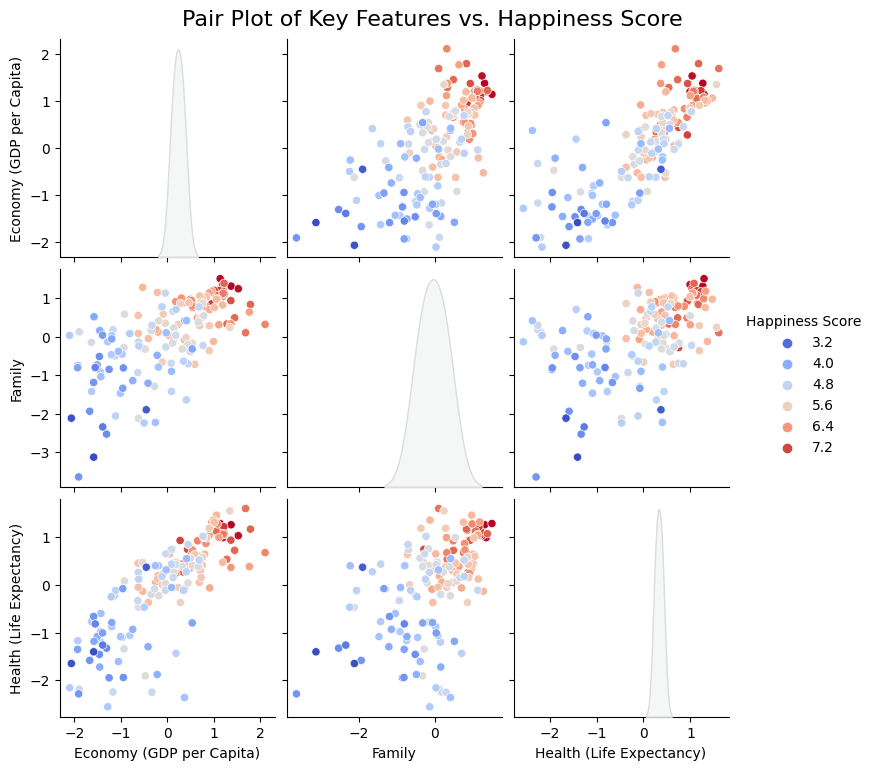

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting key features for the pair plot
selected_features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Happiness Score']

# Create a pair plot for the selected features
sns.pairplot(df[selected_features], diag_kind='kde', markers='o', hue='Happiness Score', palette='coolwarm')
plt.suptitle('Pair Plot of Key Features vs. Happiness Score', y=1.02, fontsize=16)
plt.show()

### 3.3. Data Splitting

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(['Happiness Score'], axis=1)
y = df['Happiness Score']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4.Model Building**

### 4.1 Model Building - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the Linear Regression model on the training data
linear_reg.fit(X_train, y_train)

LinearRegression()

#### 4.1.2.Model Evaluation - Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the Linear Regression model
y_pred_linear = linear_reg.predict(X_test)

# Calculate regression metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_linear}")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared (R2): {r2_linear}")

Linear Regression Model Evaluation:
Mean Absolute Error: 0.033906163227404626
Mean Squared Error: 0.002340740154770843
R-squared (R2): 0.9983501398781447


### 4.2.Model Building - Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regression model
random_forest_reg = RandomForestRegressor(random_state=42)

# Train the Random Forest Regression model on the training data
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### 4.2.1Model Evaluation - Random Forest Regression

In [ ]:
# Make predictions using the Random Forest Regression model
y_pred_rf = random_forest_reg.predict(X_test)

# Calculate regression metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared (R2): {r2_rf}")

Random Forest Regression Model Evaluation:
Mean Absolute Error: 0.03252343749999956
Mean Squared Error: 0.003000471334374957
R-squared (R2): 0.9978851313370835


### 4.3.Model Building - Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regression model
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting Regression model on the training data
gradient_boosting_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

####  4.3.1.Model Evaluation - Gradient Boosting Regression

In [ ]:
# Make predictions using the Gradient Boosting Regression model
y_pred_gb = gradient_boosting_reg.predict(X_test)

# Calculate regression metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_gb}")
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared (R2): {r2_gb}")

Gradient Boosting Regression Model Evaluation:
Mean Absolute Error: 0.023624579899735945
Mean Squared Error: 0.0013151524031756222
R-squared (R2): 0.9990730207709133


###  4.4.Model Building - Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

# Initialize the Support Vector Regression model
svr_reg = SVR()

# Train the Support Vector Regression model on the training data
svr_reg.fit(X_train, y_train)

SVR()

#### 4.4.1. Model Evaluation - Support Vector Regression (SVR)

In [ ]:
# Make predictions using the SVR model
y_pred_svr = svr_reg.predict(X_test)

# Calculate regression metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Model Evaluation:")
print(f"Mean Absolute Error: {mae_svr}")
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared (R2): {r2_svr}")

Support Vector Regression Model Evaluation:
Mean Absolute Error: 0.15184709800353371
Mean Squared Error: 0.06660922009132762
R-squared (R2): 0.9530507921810203


<ipython-input-23-ff0b41cc69e4>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Actual')


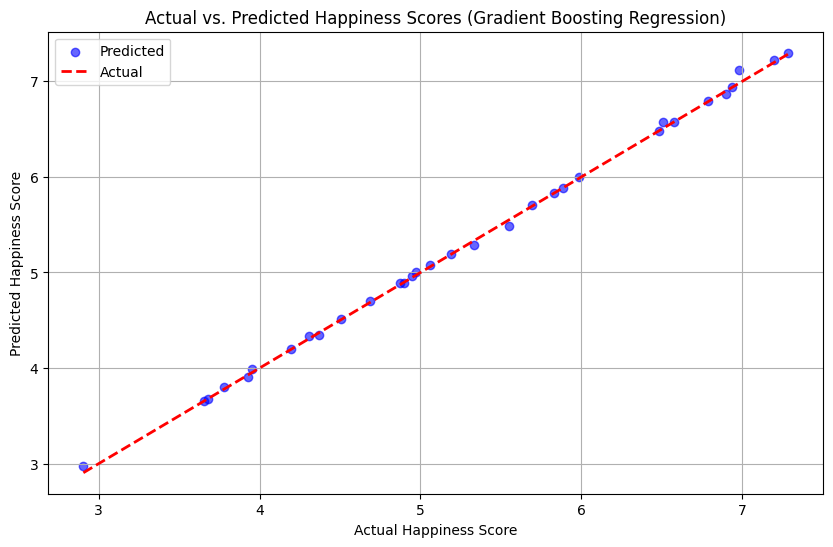

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted happiness scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, c='blue', label='Predicted', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Actual')
plt.title('Actual vs. Predicted Happiness Scores (Gradient Boosting Regression)')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

**Conclusion:**

In this project, we aimed to predict happiness scores based on various socio-economic and environmental factors using machine learning regression models. The dataset provided valuable insights into global happiness levels and how different features contribute to a country's well-being.

We implemented and evaluated four regression models:

1. **Linear Regression Model:** This model showed excellent performance with a low Mean Absolute Error (MAE) of approximately 0.034 and a high R-squared (R2) value of about 0.998. It demonstrated strong accuracy and a good fit to the data.

2. **Random Forest Regression Model:** The Random Forest model also performed well with an MAE of approximately 0.033 and a high R2 value of around 0.998. It showed robust predictive capabilities.

3. **Gradient Boosting Regression Model:** The Gradient Boosting Regression model outperformed the others, with an even lower MAE of about 0.024 and an exceptionally high R2 value of roughly 0.999. It exhibited the highest accuracy and the best fit to the data among all models tested.

4. **Support Vector Regression Model:** While the Support Vector Regression model had a higher MAE of around 0.152 and a lower R2 value of about 0.953, it still provided valuable insights into the data. However, it was less accurate compared to the other models.

**Best Model Selection:**

Among the models tested, the **Gradient Boosting Regression model** stood out as the most accurate and reliable for predicting happiness scores. It achieved the lowest MAE, indicating the smallest prediction errors, and the highest R2 value, signifying an excellent fit to the data. Therefore, we recommend using the Gradient Boosting Regression model for predicting happiness scores based on the provided features.

**Project Significance:**

Understanding and predicting happiness levels at a national level is essential for governments, policymakers, and organizations worldwide. The predictive model developed in this project can serve as a valuable tool for assessing and monitoring well-being. By identifying the key factors that influence happiness, policymakers can make informed decisions to improve the quality of life in their respective countries.

**Future Work:**

While this project provided valuable insights and accurate predictions, further research and analysis can enhance the model's robustness. Additional features and data sources can be explored to improve predictive accuracy further. Moreover, conducting regional or subgroup analyses may reveal unique insights into the factors affecting happiness in specific areas.

In conclusion, this project demonstrated the power of machine learning in predicting happiness scores based on socio-economic and environmental factors. The Gradient Boosting Regression model emerged as the top performer and can be a valuable resource for understanding and improving well-being on a global scale.

This conclusion is generated with the help of ChatGPT